# Housing Data Preparation and Analysis

### Author : AFANDI Soufiane 
#### Linkedin : https://www.linkedin.com/in/afandi-soufiane/
--------------------------------------------------------------------------------------------------------------------------------------

**Project overview :**

I am using the ***Scrapy framework*** to scrape datasets from websites offering real estate listings for sales and rentals. The goal is to analyze this data and develop a ***Machine Learning*** model that ***suggests*** listings to clients based on their preferences and financial capabilities. 

This involves extracting relevant features from the listings, such as location, price, property type, and amenities, and using these features to train a ***recommendation system***. 

The system will leverage data analysis, data science techniques, and business intelligence to provide personalized and financially feasible real estate options for clients. 

This project aims to enhance the user experience and optimize the property search process, ultimately driving better business outcomes for real estate platforms.


**Current Notebook :**

In this notebook i am going to prepare a dataset that i scrapped using Scrapy Framework from ***Mubawab*** and ***Avito*** website.

- Mubawab is a leading real estate portal for Morocco. Rent, buy and sell with ease thanks to the widest choice of real estate.

- Avito is the number 1 platform for selling and purchasing goods and services.

# 1. Setup Environment

In [85]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 476.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 706.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/300.2 kB 700.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 655.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 663.4 kB/s eta 0:00:00


In [179]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AFANDI
[nltk_data]     Soufiane\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [49]:
english_stop_words = stopwords.words('english')
french_stop_words = stopwords.words('french')
french_stop_words = stopwords.words('arabic')

In [50]:
all_stop_words = english_stop_words+french_stop_words+french_stop_words

In [54]:
len(all_stop_words)

493

**Useful Functions :**

In [73]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

# 2. Import Data

In [4]:
mh_dataset = pd.read_csv('market housing full data exported at 19-05-2024 - mubawab and avito.csv')

In [5]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
0,https://www.mubawab.ma/fr/pa/7476862/apparteme...,Appartement de 100m² en vente Noor Asilah,Publié aujourdhui,Prix à consulter,Asilah,100 m² ;3 Pièces;2 Chambres;2 Salles de bains,Si vous êtes à la recherche d’une résidence ca...,Type de bien;Appartement;Etat ;Nouveau;Standin...,2024-05-17
1,https://www.mubawab.ma/fr/a/7915969/luxueux-st...,Luxueux studio à vendre 63m² La Ferme Bretonne,Publié aujourdhui,1 450 000 DH,Ferme Bretonne (Hay Arraha) à Casablanca,63 m² ;2 Pièces;1 Chambre;1 Salle de bain,Studio très haut standing de 63m² dont 9m² de ...,Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
2,https://www.mubawab.ma/fr/a/7916043/studio-de-...,"Studio de Luxe à Palmier 1ère étage, Ascenseur",Publié aujourdhui,7 800 DH,Palmier à Casablanca,62 m² ;2 Pièces;1 Chambre;1 Salle de bain,"studio de standing, idéalement situé au premie...",Type de bien;Appartement;Etat ;Nouveau;Etat du...,2024-05-17
3,https://www.mubawab.ma/fr/a/7916424/vente-appa...,Vente appartement rénové,Publié aujourdhui,1 500 000 DH,Val Fleury à Casablanca,124 m² ;5 Pièces;3 Chambres;1 Salle de bain,Excellent appartement voisinage agréable pour ...,Type de bien;Appartement;Etat ;Bon état;Étage ...,2024-05-17
4,https://www.mubawab.ma/fr/a/7916833/bel-appart...,Bel appartement spacieux,Publié aujourdhui,1 200 000 DH,Route de Safi à Marrakech,103 m² ;4 Pièces;2 Chambres;1 Salle de bain,Il est dans le quartier rouidate à quelques mi...,Type de bien;Appartement;Etat ;Bon état;Etat d...,2024-05-17


**Overview :** 

The above dataset that i have scrapped using Scrapy Framework took me 3-4 days (~ 1h per day = 3-4 hours in general), on two real estate websites in Morroco (Avito - Mubawab), just to start using data cleaning process so that i can automate this process in the future.

**Data Description :**

This dataset contains :

- *<u>advertisement_url</u>* : Which is the full URL of the page in the website on which i retrieve detailed information on the current real estate announcement.

- *<u>title</u>* : The title of the property advertisement.

- *<u>publication_date</u>* : The date the advertisement was published by its owner.

- *<u>price</u>* : The price of the property (in ***DH*** = Moroccan ***D***ir***H***am : the official monetary currency of Morocco).

- *<u>location</u>* : The exact location of the property.

- *<u>description</u>* : Detail parts of the property.
 
- *<u>complete_description</u>* : Complete description of the property established by its owner.

- *<u>features_list</u>* : A liste of The property type (Apartment, House, Villa, farmhouse, ...),  property state, number of floors ...

- *<u>insert_date</u>* : The Date the current announcement was scrapped.

In [6]:
mh_dataset.shape

(1734, 9)

In [7]:
mh_dataset.isnull().sum()

advertisement_url          0
title                      0
publication_date           0
price                      0
location                   0
description             1076
complete_description       0
features_list              0
insert_date                0
dtype: int64

**Notice :**

The 1076 rows which have null value in 'description' field, were caused because of the scrape failure. (Scrapy can't scrap svg element ... but i still work on it for future updates, trying to solve it using Selenium with Scrapy).

In [8]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1734 entries, 0 to 1733
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   advertisement_url     1734 non-null   object
 1   title                 1734 non-null   object
 2   publication_date      1734 non-null   object
 3   price                 1734 non-null   object
 4   location              1734 non-null   object
 5   description           658 non-null    object
 6   complete_description  1734 non-null   object
 7   features_list         1734 non-null   object
 8   insert_date           1734 non-null   object
dtypes: object(9)
memory usage: 122.1+ KB


# 3. Data Cleaning

## 3.1 remove '\n' and '\t' characters in the dataset

===> This code bloc is disabled for future commits ... because, i've automated this data cleaning process inside the spider using **ItemLoaders**.

In [20]:
# mh_dataset['title'] = mh_dataset['title'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['publication_date'] = mh_dataset['publication_date'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['price'] = mh_dataset['price'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['location'] = mh_dataset['location'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['description'] = mh_dataset['description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['complete_description'] = mh_dataset['complete_description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['features_list'] = mh_dataset['features_list'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))

## 3.2 Fix the shifted values issue in some lines

===> This problem may appear sometimes...so it is necessary to check and resolve it.

In [47]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
id,,,,,,,,,
1,https://www.mubawab.ma/fr/pa/7779122/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 034 750 DH,Centre Ville à Mohammedia,83 m² ;3 Pièces;2 Chambres;1 Sa...,"<p>RESIDENCE NATURA LIVING, une résidence verd...",Jardin;Terrasse;Garage;Ascenseur;Piscine;Conci...,2024-04-30
2,https://www.mubawab.ma/fr/pa/6292037/apparteme...,"Appartement de 94m² 3 chambre en vente, Rio Be...",Publié aujourdhui,11 000 DH,Sidi Rahal,94 m² ;4 Pièces;3 Chambres;2 Sa...,"<p>Agréable appartement à vendre. 4 pièces, 3 ...",Jardin;Terrasse;Garage;Vue sur mer;Piscine;Con...,2024-04-30
3,https://www.mubawab.ma/fr/pa/7203490/apparteme...,"Appartement de 100 m² en vente, Eden Island Bo...",Publié aujourdhui,2 200 000 DH,Plage Oued Cherrat à Bouznika,100 m² ;3 Pièces;2 Chambres;1 S...,"<p>Découvrez « EDEN ISLAND », une réalisation ...",Orientation: Sud ...,2024-04-30
4,https://www.mubawab.ma/fr/pa/7617451/apparteme...,Appartement 55m² en vente Riad Assalam,Publié aujourdhui,250 000 DH,Al Aalia à Mohammedia,55 m² ;4 Pièces;3 Chambres;1 Sa...,<p>Achetez l'appartement de vos rêves au milie...,Ascenseur,2024-04-30
5,https://www.mubawab.ma/fr/pa/7859027/superbe-a...,Superbe appartement à vendre à Boukhalef. 2 ch...,Publié aujourdhui,"N,Boukhalef à Tanger """,72 m² ;3 Pièces;2 Chambres;2 Sa...,"<p>Appartement idéal à la vente. 3 pièces, 2 s...",Jardin;Concierge;Sécurité;Cuisine équipée,2024-04-30,NaN


In [28]:
# check if there is some records with this issue by executing this command line ...
# sum(mh_dataset['insert_date'].isna())

----------------------------------------------------------------------------------------------------
(***!***) **As what we can notice here :** 
- That "*insert_data*" value is "*NaN*", but in reality it's in the wrong field "*features_list*".
- Also the field "*complete_description*" has the value of "*features_list*" field.
- and so on ...

so from the "*price*" field until "*insert_date*" field, the values were shifted.

to solve this issue we gonna use the next code bloc:

In [29]:
def is_shifted(row):
    """
    Check if current line is shifted or not.
    """
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    
    if str(row['insert_date']) == 'nan' and re.match(r"^\d{4}-\d{2}-\d{2}$" , str(row['features_list'])):
        return True
    return False

In [30]:
 def fix_shift(row):
        row.loc["price": "insert_date"] = row.loc["price": "insert_date"].shift(1)
        row.loc["price"] = "nan" 
        return row

In [31]:
def detect_and_fix_shifted_rows(dataframe):
    corrected_df = dataframe.copy()
    for index, row in dataframe.iterrows():
        if is_shifted(row):
            corrected_df.loc[index] = fix_shift(row)
    
    return corrected_df

In [169]:
print("Original DataFrame:")
mh_dataset.head()

Original DataFrame:


,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
id,,,,,,,,,
1,https://www.mubawab.ma/fr/pa/7779122/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 034 750 DH,Centre Ville à Mohammedia,83 m² ;3 Pièces;2 Chambres;1 Sa...,"<p>RESIDENCE NATURA LIVING, une résidence verd...",Jardin;Terrasse;Garage;Ascenseur;Piscine;Conci...,2024-04-30
2,https://www.mubawab.ma/fr/pa/6292037/apparteme...,"Appartement de 94m² 3 chambre en vente, Rio Be...",Publié aujourdhui,11 000 DH,Sidi Rahal,94 m² ;4 Pièces;3 Chambres;2 Sa...,"<p>Agréable appartement à vendre. 4 pièces, 3 ...",Jardin;Terrasse;Garage;Vue sur mer;Piscine;Con...,2024-04-30
3,https://www.mubawab.ma/fr/pa/7203490/apparteme...,"Appartement de 100 m² en vente, Eden Island Bo...",Publié aujourdhui,2 200 000 DH,Plage Oued Cherrat à Bouznika,100 m² ;3 Pièces;2 Chambres;1 S...,"<p>Découvrez « EDEN ISLAND », une réalisation ...",Orientation: Sud ...,2024-04-30
4,https://www.mubawab.ma/fr/pa/7617451/apparteme...,Appartement 55m² en vente Riad Assalam,Publié aujourdhui,250 000 DH,Al Aalia à Mohammedia,55 m² ;4 Pièces;3 Chambres;1 Sa...,<p>Achetez l'appartement de vos rêves au milie...,Ascenseur,2024-04-30
5,https://www.mubawab.ma/fr/pa/7859027/superbe-a...,Superbe appartement à vendre à Boukhalef. 2 ch...,Publié aujourdhui,"N,Boukhalef à Tanger """,72 m² ;3 Pièces;2 Chambres;2 Sa...,"<p>Appartement idéal à la vente. 3 pièces, 2 s...",Jardin;Concierge;Sécurité;Cuisine équipée,2024-04-30,NaN


In [170]:
if sum(mh_dataset['insert_date'].isna()) > 0 :
    mh_dataset = detect_and_fix_shifted_rows(mh_dataset)
    print("\nCorrected DataFrame:")
mh_dataset.head()


Corrected DataFrame:


,advertisement_url,title,publication_date,price,location,description,complete_description,features_list,insert_date
id,,,,,,,,,
1,https://www.mubawab.ma/fr/pa/7779122/bel-appar...,Bel Appartement à vendre à Mohammedia,Publié aujourdhui,1 034 750 DH,Centre Ville à Mohammedia,83 m² ;3 Pièces;2 Chambres;1 Sa...,"<p>RESIDENCE NATURA LIVING, une résidence verd...",Jardin;Terrasse;Garage;Ascenseur;Piscine;Conci...,2024-04-30
2,https://www.mubawab.ma/fr/pa/6292037/apparteme...,"Appartement de 94m² 3 chambre en vente, Rio Be...",Publié aujourdhui,11 000 DH,Sidi Rahal,94 m² ;4 Pièces;3 Chambres;2 Sa...,"<p>Agréable appartement à vendre. 4 pièces, 3 ...",Jardin;Terrasse;Garage;Vue sur mer;Piscine;Con...,2024-04-30
3,https://www.mubawab.ma/fr/pa/7203490/apparteme...,"Appartement de 100 m² en vente, Eden Island Bo...",Publié aujourdhui,2 200 000 DH,Plage Oued Cherrat à Bouznika,100 m² ;3 Pièces;2 Chambres;1 S...,"<p>Découvrez « EDEN ISLAND », une réalisation ...",Orientation: Sud ...,2024-04-30
4,https://www.mubawab.ma/fr/pa/7617451/apparteme...,Appartement 55m² en vente Riad Assalam,Publié aujourdhui,250 000 DH,Al Aalia à Mohammedia,55 m² ;4 Pièces;3 Chambres;1 Sa...,<p>Achetez l'appartement de vos rêves au milie...,Ascenseur,2024-04-30
5,https://www.mubawab.ma/fr/pa/7859027/superbe-a...,Superbe appartement à vendre à Boukhalef. 2 ch...,Publié aujourdhui,nan,"N,Boukhalef à Tanger """,72 m² ;3 Pièces;2 Chambres;2 Sa...,"<p>Appartement idéal à la vente. 3 pièces, 2 s...",Jardin;Concierge;Sécurité;Cuisine équipée,2024-04-30


In [172]:
sum(mh_dataset['insert_date'].isna())

0

## 3.3 'advertisement_url' column cleaning

In [9]:
mh_dataset['advertisement_url']

0       https://www.mubawab.ma/fr/pa/7476862/apparteme...
1       https://www.mubawab.ma/fr/a/7915969/luxueux-st...
2       https://www.mubawab.ma/fr/a/7916043/studio-de-...
3       https://www.mubawab.ma/fr/a/7916424/vente-appa...
4       https://www.mubawab.ma/fr/a/7916833/bel-appart...
                              ...                        
1729    https://www.avito.ma/fr/maarif/appartements/43...
1730    https://www.avito.ma/fr/hay_riad/appartements/...
1731    https://www.avito.ma/fr/centre_ville/locations...
1732    https://www.avito.ma/fr/marjane/appartements/a...
1733    https://www.avito.ma/fr/route_de_sefrou/terrai...
Name: advertisement_url, Length: 1734, dtype: object

**The first step I'm going to do is grab the website name and create a new column that also shows the name of the website the ad belongs to.**

In [10]:
mh_dataset['origin_website'] = mh_dataset['advertisement_url'].apply(lambda x: x.split('.')[1])

In [11]:
mh_dataset['origin_website'].describe()

count      1734
unique        2
top       avito
freq       1076
Name: origin_website, dtype: object

In [12]:
mh_dataset['origin_website'].unique()

array(['mubawab', 'avito'], dtype=object)

In [29]:
highest_count  =  {
    "name" : "avito",
    "value": mh_dataset[mh_dataset['origin_website'] == 'avito'].shape[0]
}

lowest_count = {
    "name" : "mubawab",
    "value": mh_dataset[mh_dataset['origin_website'] == 'mubawab'].shape[0]
}

r = (100 * (highest_count["value"] - lowest_count["value"])) / highest_count["value"]

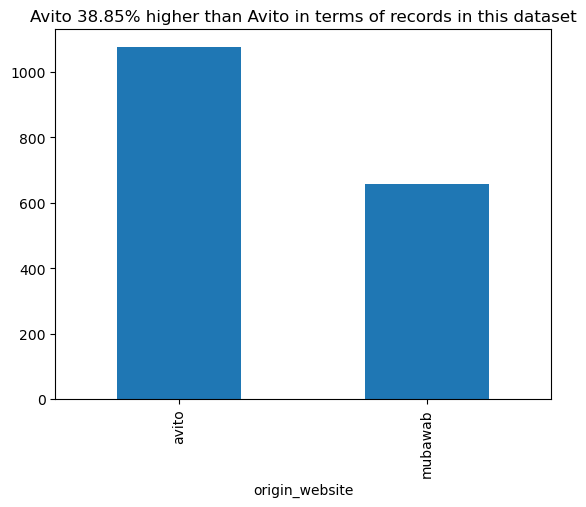

In [31]:
mh_dataset['origin_website'].value_counts().plot(kind='bar')
plt.title(f"{highest_count['name'].capitalize()} {round(r, 2)}% higher than {highest_count['name'].capitalize()} in terms of records in this dataset")
plt.show()

## 3.4 'title' column cleaning

In [113]:
mh_dataset['title']

0            Appartement de 100m² en vente Noor Asilah 
1       Luxueux studio à vendre 63m² La Ferme Bretonne 
2       Studio de Luxe à Palmier 1ère étage, Ascenseur 
3                             Vente appartement rénové 
4                             Bel appartement spacieux 
                             ...                       
1729     43458-Vente Appt à Casablanca Maarif de 166 m²
1730                Appartement à vendre 178 m² à Rabat
1731                        des appartements par jours 
1732                       appartement meublé a vendre 
1733                  Terrain de 12.8 Ha à FES Ain Bida
Name: title, Length: 1734, dtype: object

I will create a "word counts" dictionary which will contain all ***unique words*** as keys and ***their occurrences*** as values.

This step will give us an ***overall overview*** of the titles in this dataset.

In [114]:
def get_unique_words(list, stop_words):
    # Combine all texts into one
    combined_text = " ".join(list)

    # Converte text to lowercase to ensure word comparison is not case sensitive + delete any character that is not a letter, number, or space.
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text.lower())

    # Retrieve all words in the test
    words = combined_text.split()

    # Count the occurrences of each word
    unique_words_dict = Counter(words)

    filtered_dict = {key: value for key, value in unique_words_dict.items() if key not in stop_words}
    
    return filtered_dict

In [115]:
unique_words_from_titles = dict(get_unique_words(list(mh_dataset['title']), all_stop_words))

In [116]:
len(unique_words_from_titles)

1612

In [117]:
unique_words_from_titles = {k: v for k, v in unique_words_from_titles.items() if v>1 and not has_numbers(k) }

In [118]:
len(unique_words_from_titles)

542

In [119]:
sorted_unique_words_from_titles = sorted(unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

In [120]:
sorted_unique_words_from_titles

[('appartement', 1050),
 ('vendre', 624),
 ('m²', 471),
 ('vente', 203),
 ('chambres', 181),
 ('casablanca', 177),
 ('louer', 162),
 ('villa', 128),
 ('bel', 94),
 ('terrain', 93),
 ('surface', 73),
 ('résidence', 73),
 ('studio', 72),
 ('meublé', 71),
 ('location', 60),
 ('hay', 54),
 ('al', 50),
 ('centre', 47),
 ('standing', 44),
 ('el', 43),
 ('totale', 42),
 ('superbe', 42),
 ('للبيع', 42),
 ('haut', 38),
 ('ville', 36),
 ('terrasse', 35),
 ('marrakech', 35),
 ('superficie', 32),
 ('شقة', 31),
 ('bouznika', 30),
 ('bouskoura', 30),
 ('belles', 28),
 ('quartier', 28),
 ('bureau', 28),
 ('neuf', 27),
 ('piscine', 27),
 ('jardin', 27),
 ('maison', 27),
 ('luxe', 26),
 ('tanger', 25),
 ('eden', 24),
 ('californie', 24),
 ('mohammedia', 24),
 ('vue', 24),
 ('island', 23),
 ('belle', 23),
 ('rabat', 23),
 ('vend', 21),
 ('salon', 21),
 ('hôpitaux', 21),
 ('plage', 20),
 ('commercial', 20),
 ('duplex', 19),
 ('bien', 19),
 ('très', 19),
 ('شقق', 19),
 ('magasin', 19),
 ('temara', 19),
 (

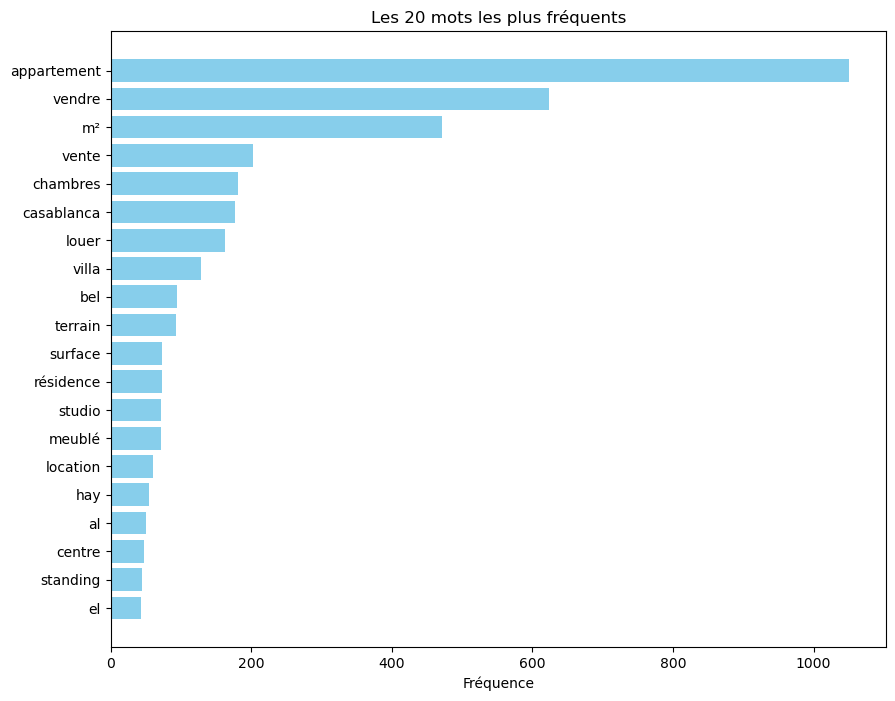

In [121]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Fréquence')
plt.title('Les 20 mots les plus fréquents')
plt.gca().invert_yaxis()
plt.show()

In [122]:
from wordcloud import WordCloud

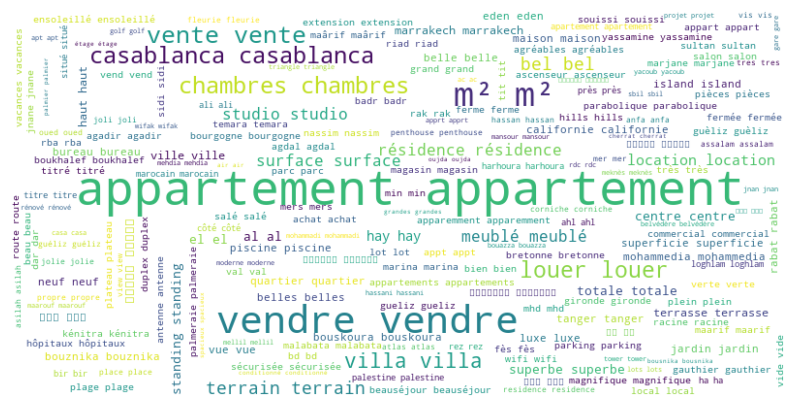

In [123]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [124]:
specific_stop_words = {"m²", "bel", "al", "el", "très", "bien", "hay","haut","belles","quartier","eden","vue","belle","badr","sidi","db","rak","racine","في","pièces","magnifique","beau","mhd","val","agréable","hills","lot","apparemment","plein","route","jnane"}

In [127]:
sorted_unique_words_from_titles = {key: value for key, value in dict(sorted_unique_words_from_titles).items() if key not in specific_stop_words}
sorted_unique_words_from_titles = sorted(sorted_unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

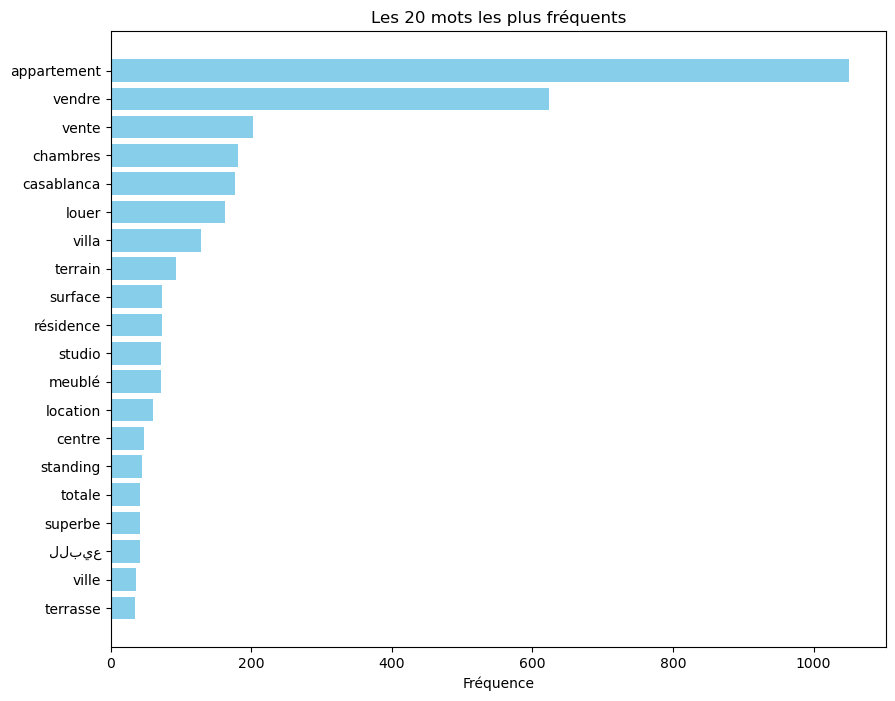

In [128]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Fréquence')
plt.title('Les 20 mots les plus fréquents')
plt.gca().invert_yaxis()
plt.show()

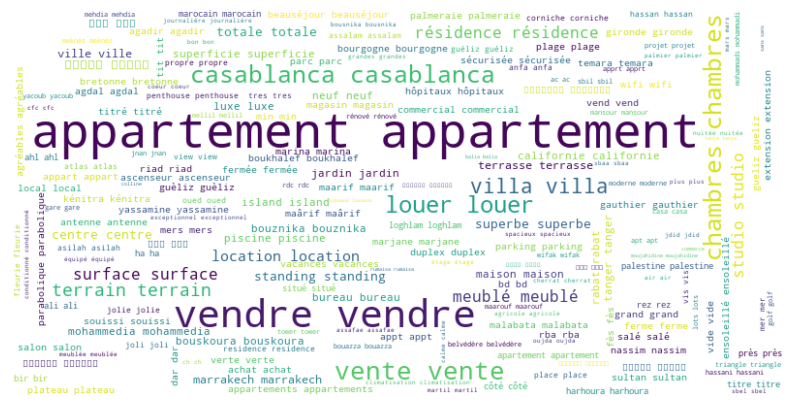

In [129]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [163]:
property_surface_pattern = r'\b(\d+)\s*m²\b'
def return_property_surface_from_text(text):
    match = re.search(pattern, text)
    if match:
        return match.group(0).split("m²")[0].replace(" ", "")+" m²"
    else:
        return None

In [164]:
mh_dataset['property_surface_from_title'] = mh_dataset['title'].apply(lambda x: return_property_surface_from_text(x))

In [165]:
mh_dataset['property_surface_from_title']

0       100 m²
1        63 m²
2         None
3         None
4         None
         ...  
1729    166 m²
1730    178 m²
1731      None
1732      None
1733      None
Name: property_surface_from_title, Length: 1734, dtype: object

In [166]:
len(mh_dataset['property_surface_from_title'][mh_dataset['property_surface_from_title'].isna() == True])

1145

In [167]:
len(mh_dataset['property_surface_from_title'][mh_dataset['property_surface_from_title'].isna() == False])

589

In [182]:
mh_dataset[['property_surface_from_title', 'origin_website']].head(3)

,property_surface_from_title,origin_website
0,100 m²,mubawab
1,63 m²,mubawab
2,None,mubawab


In [195]:
sub_set = mh_dataset[['property_surface_from_title', 'origin_website']]

In [199]:
sub_set['property_surface_from_title'] = sub_set['property_surface_from_title'].apply(lambda x: x if x is None else int(x.split(' ')[0]))

C:\Users\AFANDI Soufiane\AppData\Local\Temp\ipykernel_7364\2674419778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_set['property_surface_from_title'] = sub_set['property_surface_from_title'].apply(lambda x: x if x is None else int(x.split(' ')[0]))


In [200]:
sub_set['property_surface_from_title'].describe()

count     589.000000
mean      171.185059
std       499.455692
min         4.000000
25%        75.000000
50%        96.000000
75%       130.000000
max      9500.000000
Name: property_surface_from_title, dtype: float64

In [206]:
sub_set = sub_set[sub_set['property_surface_from_title']  < 1000 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


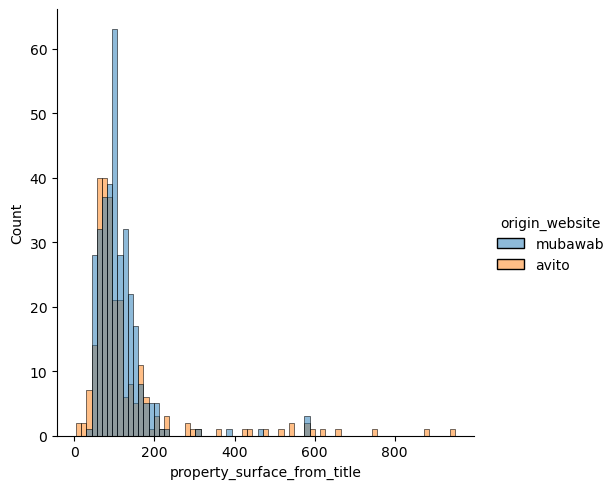

In [212]:
sns.displot(sub_set, x='property_surface_from_title', hue='origin_website')

In [213]:
sub_set = sub_set[sub_set['property_surface_from_title']  < 300 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

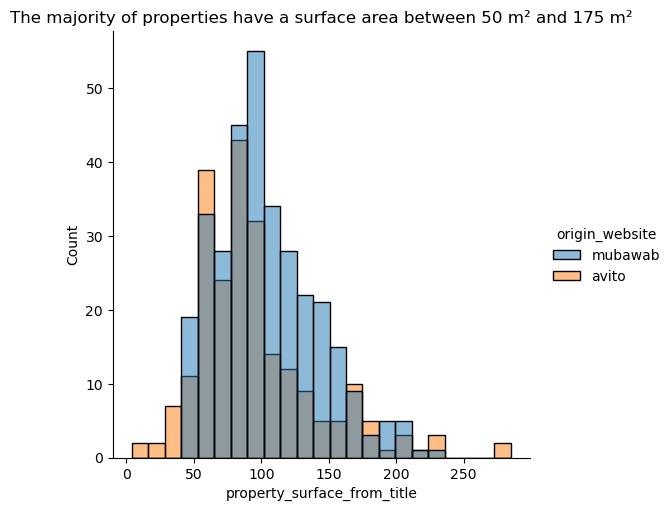

In [222]:
sns.displot(sub_set, x='property_surface_from_title', hue='origin_website')
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

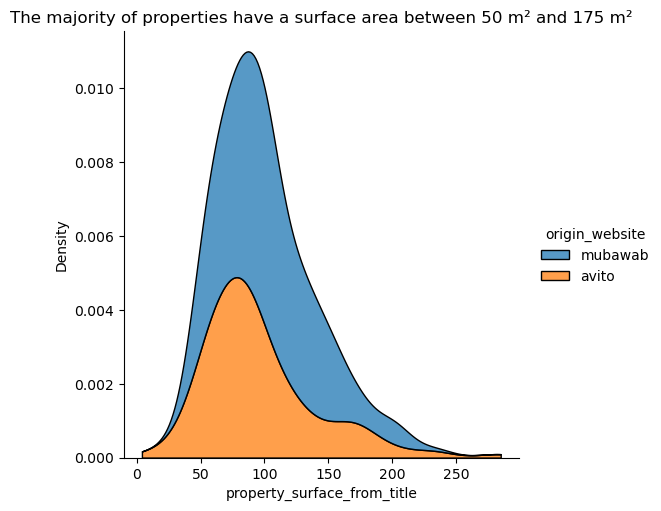

In [223]:
# Kernel density estimation
sns.displot(sub_set, x='property_surface_from_title', hue='origin_website', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

## 3.5 'publication_date' column cleaning

In [ ]:
mh_dataset['publication_date']

## 3.6 'price' column cleaning

In [ ]:
mh_dataset['price']

## 3.7 'location' column cleaning

In [ ]:
mh_dataset['location']

## 3.8 'description' column cleaning

In [ ]:
mh_dataset['description']

## 3.9 'complete_description' column cleaning

In [ ]:
mh_dataset['complete_description']

## 3.10 'features_list' column cleaning

In [ ]:
mh_dataset['features_list']

## 3.11 'insert_date' column cleaning

In [ ]:
mh_dataset['insert_date']